In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
dataset = pd.read_csv('Absenteeism_at_work.csv')
dataset.head(10)

In [3]:
dataset.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [4]:
#shape and type of dataset
print('Shape of dataset is:{}'.format(dataset.shape))
print('Type of features is:{}'.format(dataset.dtypes))

Shape of dataset is:(740, 21)
Type of features is:ID                                  int64
Reason for absence                  int64
Month of absence                    int64
Day of the week                     int64
Seasons                             int64
Transportation expense              int64
Distance from Residence to Work     int64
Service time                        int64
Age                                 int64
Work load Average/day              object
Hit target                          int64
Disciplinary failure                int64
Education                           int64
Son                                 int64
Social drinker                      int64
Social smoker                       int64
Pet                                 int64
Weight                              int64
Height                              int64
Body mass index                     int64
Absenteeism time in hours           int64
dtype: object


In [5]:
#mean of column 'Absenteeism time in hours'
dataset['Absenteeism time in hours'].mean()

6.924324324324324

(array([677.,  19.,  22.,   7.,   3.,   3.,   3.,   0.,   1.,   5.]),
 array([  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.,  96., 108., 120.]),
 <BarContainer object of 10 artists>)

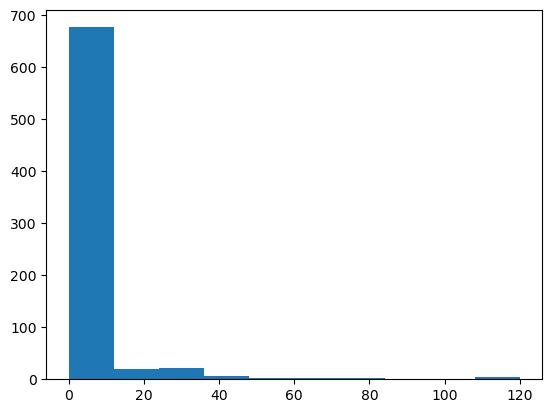

In [6]:
#histogram view of Absenteeism time in hours
plt.hist(dataset["Absenteeism time in hours"])

<Figure size 1400x700 with 0 Axes>

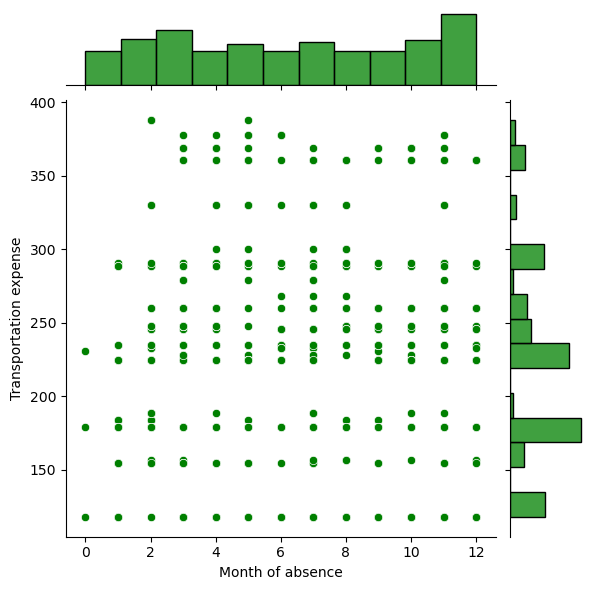

<Figure size 1400x700 with 0 Axes>

In [7]:
sns.jointplot(y='Transportation expense',x='Month of absence',data=dataset,kind='scatter',color='green')
plt.figure(figsize=(14,7))

<Figure size 1200x600 with 0 Axes>

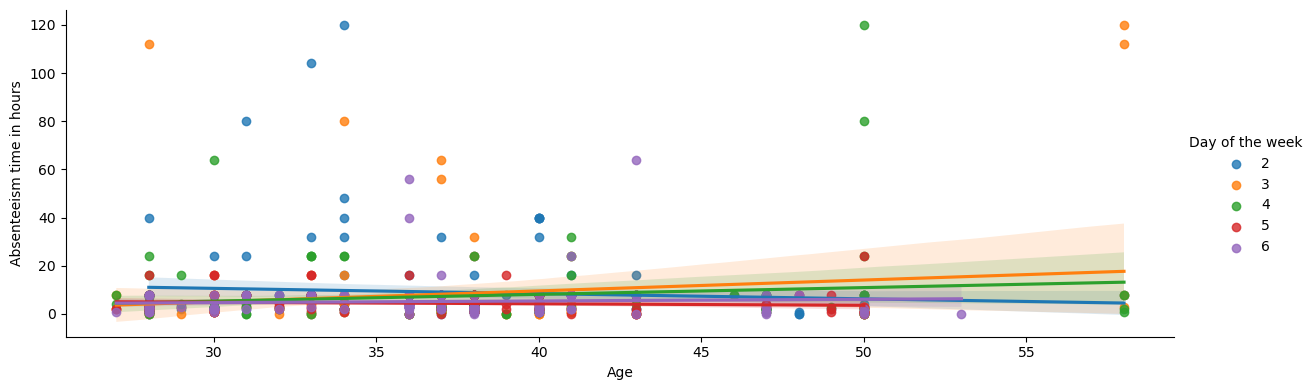

<Figure size 1200x600 with 0 Axes>

In [8]:
sns.lmplot(x='Age',y='Absenteeism time in hours',data=dataset,hue='Day of the week',height=4,aspect=3)
plt.figure(figsize=(12,6))

<AxesSubplot:ylabel='Frequency'>

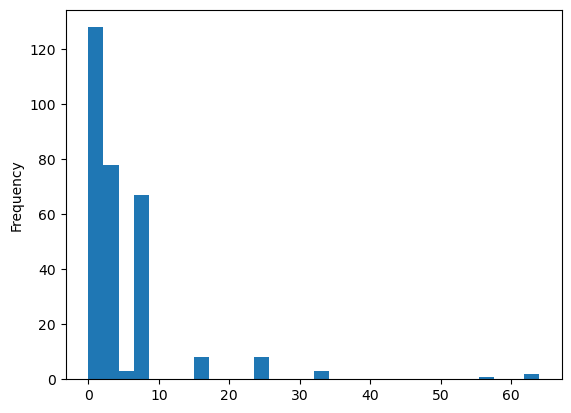

In [9]:
dataset[dataset['Son']==0]['Absenteeism time in hours'].plot.hist(bins=30)

<Figure size 1000x500 with 0 Axes>

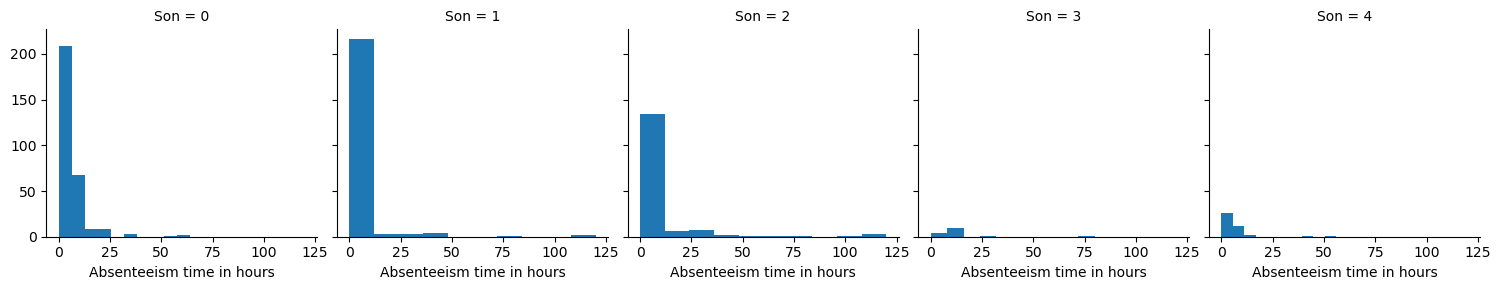

<Figure size 1000x500 with 0 Axes>

In [10]:
g = sns.FacetGrid(data=dataset,col='Son')
g.map(plt.hist,'Absenteeism time in hours')
plt.figure(figsize=(10,5))


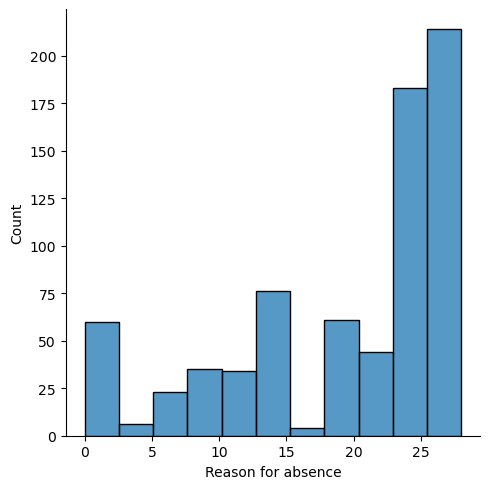

In [11]:
sns.displot(dataset['Reason for absence'])

In [12]:
#count of entries in column 
dataset[dataset['Absenteeism time in hours']==0].count()
dataset.head(740)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,"264,604",...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,"264,604",...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,"271,219",...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,"271,219",...,0,1,2,1,0,2,100,170,35,0


In [ ]:
#dropping unecessary columns
dataset.drop(['Work load Average/day '], axis=1, inplace=True)
dataset.head()

In [30]:
#dividing dataset inorder to test and train the model
X = dataset.iloc[:,:20]
Y = dataset.iloc[:,19:]

In [31]:
#Dividing data inorder to train and predict 
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size= 0.3,shuffle=False)  

In [32]:
from sklearn.ensemble import RandomForestRegressor
#Passing parameters so that to train the model
regressor = RandomForestRegressor(n_estimators= 100, max_features= 'auto',max_depth=None,min_samples_leaf=1)

In [ ]:
#predicting the Target Variable
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)
y_pred

In [ ]:
dataset.tail(6)
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)